# Datathon Mayo 2018  **_"Haciendo el gasto fiscal visible para el público"_**
## Ingresos y Gastos anuales del Gobierno Central

## Lectura de Datos

In [37]:
import os
import pandas as pd
import pandas_profiling as pd_profiling
import altair as alt
import matplotlib.pyplot as plt
#%matplotlib ipympl

In [2]:
def read_field_type(x):
    '''
    Para facilitar la lectura de los dataframes con los tipos de columna correspondientes.
    '''
    if x in ['String']:
        return str
    elif x in ['Integer', 'Long']:
        return int
    else:
        return str

In [5]:
spend_gob_names = pd.read_csv(os.path.join('data', 
                              'dataset_3_Revenue_and_ pending_(Central_Government)_Real_DICTIONARY.csv'), 
                              sep=';', 
                              encoding='iso-8859-1')

In [6]:
spend_gob_names

,Field name,Field type,Field size,Field format,Range,Description,Example
0,Periodo,Integer,9,#,1990 to 2017,Year of the revenue or spend,1990
1,NIVEL1,String,63,NaN,2 categories,First Level of de State Operations Report of t...,TRANSACCIONES QUE AFECTAN EL PATRIMONIO NETO
2,NIVEL2,String,42,NaN,3 categories,Second Level of de State Operations Report of ...,GASTOS
3,NIVEL3,String,56,NaN,16 categories,Third Level of de State Operations Report of t...,Personal
4,Real_Amount,Integer,10,#,"(-76356,02) to 30754067,04",Real Amount in millions (chilean pesos). This ...,30754067


In [7]:
spend_gob = pd.read_csv(os.path.join('data', 
                              'dataset_3_Revenue_and_ pending_(Central_Government)_1990-2017 (real).csv'),
                 sep=';', 
                 encoding='iso-8859-1',
                 dtype=dict(zip(spend_gob_names['Field name'], spend_gob_names['Field type'].apply(read_field_type))))

In [23]:
spend_gob.columns = spend_gob.columns.str.lower()

In [47]:
spend_gob['real_amount'] = spend_gob['real_amount'].str.replace(',', '.').astype(float)

In [9]:
spend_gob.head(5) 

,Periodo,NIVEL1,NIVEL2,NIVEL3,Real_amount
0,1990,TRANSACCIONES EN ACTIVOS NO FINANCIEROS,ADQUISICION NETA DE ACTIVOS NO FINANCIEROS,Inversión,"786184,56"
1,1991,TRANSACCIONES EN ACTIVOS NO FINANCIEROS,ADQUISICION NETA DE ACTIVOS NO FINANCIEROS,Inversión,"970813,77"
2,1992,TRANSACCIONES EN ACTIVOS NO FINANCIEROS,ADQUISICION NETA DE ACTIVOS NO FINANCIEROS,Inversión,"1165103,28"
3,1993,TRANSACCIONES EN ACTIVOS NO FINANCIEROS,ADQUISICION NETA DE ACTIVOS NO FINANCIEROS,Inversión,"1432888,73"
4,1994,TRANSACCIONES EN ACTIVOS NO FINANCIEROS,ADQUISICION NETA DE ACTIVOS NO FINANCIEROS,Inversión,"1568702,18"


Ejemplito

In [49]:
cobre = spend_gob.query("nivel3 == 'Cobre bruto'")

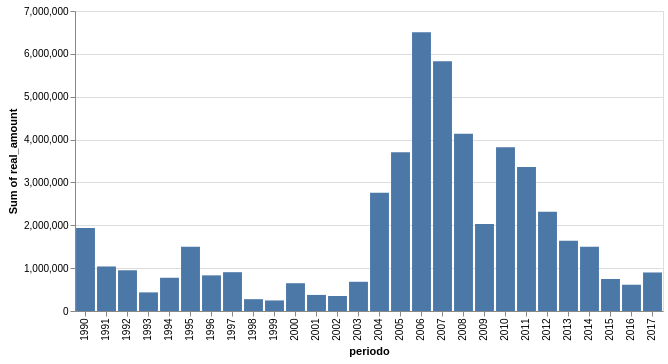

In [50]:
alt.Chart(cobre).mark_bar().encode(
    x='periodo:O',
    y='sum(real_amount):Q'
)